### Instala bibliotecas e copia repositórios

In [ ]:
import torch

# Verificar se há uma GPU disponível
if torch.cuda.is_available():
    # Obter o nome da GPU
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU disponível: {gpu_name}")
else:
    print("Nenhuma GPU disponível.")


GPU disponível: NVIDIA A100-SXM4-40GB


In [ ]:
import os
import shutil
import json
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
!pip install -r /content/RT-DETR/rtdetr_pytorch/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Clona o repositório
!git clone https://github.com/lyuwenyu/RT-DETR
!git clone https://github.com/pedrozamboni/individual_urban_tree_crown_detection

Cloning into 'RT-DETR'...
remote: Enumerating objects: 990, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 990 (delta 2), reused 8 (delta 1), pack-reused 978 (from 1)
Receiving objects: 100% (990/990), 622.01 KiB | 5.32 MiB/s, done.
Resolving deltas: 100% (460/460), done.
Cloning into 'individual_urban_tree_crown_detection'...
remote: Enumerating objects: 696, done.
remote: Total 696 (delta 0), reused 0 (delta 0), pack-reused 696 (from 1)
Receiving objects: 100% (696/696), 184.86 MiB | 55.16 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (677/677), done.


In [ ]:
import os
import random

##########################
## Unifica arquivos txt ##
##########################

# Caminhos de entrada e saída
base_input_path = "/content/individual_urban_tree_crown_detection/img_list"
output_base_path = "/content/RT-DETR/rtdetrv2_pytorch/dataset/img_list"

# Nomes dos arquivos que deseja combinar
file_names = ["test.txt", "train.txt", "val.txt"]

# Certifique-se de que o diretório de saída exista
os.makedirs(output_base_path, exist_ok=True)

# Conjunto para armazenar valores únicos
unique_lines = set()

# Combinar conteúdo de todos os arquivos
for file_name in file_names:
    # Percorrer os diretórios 0 a 4
    for i in range(5):  # Intervalo de 0 a 4
        file_path = os.path.join(base_input_path, str(i), file_name)
        if os.path.exists(file_path):  # Verifica se o arquivo existe
            with open(file_path, 'r') as file:
                unique_lines.update(file.readlines())

# Ordenar os valores únicos
sorted_lines = sorted(unique_lines)

# Dividir os dados em treino (70%), validação (20%) e teste (10%)
total_lines = len(sorted_lines)
train_end = int(0.7 * total_lines)
val_end = int(0.9 * total_lines)

train_lines = sorted_lines[:train_end]
val_lines = sorted_lines[train_end:val_end]
test_lines = sorted_lines[val_end:]

# Salvar os arquivos
file_paths = {
    "train.txt": train_lines,
    "val.txt": val_lines,
    "test.txt": test_lines,
}

for file_name, lines in file_paths.items():
    output_path = os.path.join(output_base_path, file_name)
    with open(output_path, 'w') as file:
        file.writelines(lines)
    print(f"Arquivo {file_name} salvo em {output_path}")


Arquivo train.txt salvo em /content/RT-DETR/rtdetrv2_pytorch/dataset/img_list/train.txt
Arquivo val.txt salvo em /content/RT-DETR/rtdetrv2_pytorch/dataset/img_list/val.txt
Arquivo test.txt salvo em /content/RT-DETR/rtdetrv2_pytorch/dataset/img_list/test.txt


In [ ]:
#copia o setup para uma pasta apartada
# !mkdir -p configs/rtdetrv2
# !cp RT-DETR/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r18vd_120e_coco.yml configs/rtdetrv2/

### Pré-processamento

In [ ]:
# ##########################
# ## unifica arquivos txt ##
# ##########################

# # Caminhos de entrada e saída
# base_input_path = "/content/individual_urban_tree_crown_detection/img_list"
# output_base_path = "/content/RT-DETR/rtdetrv2_pytorch/dataset/img_list"

# # Nomes dos arquivos que deseja combinar
# file_names = ["test.txt", "train.txt", "val.txt"]

# # Certifique-se de que o diretório de saída exista
# os.makedirs(output_base_path, exist_ok=True)

# # Combinar cada arquivo separadamente
# for file_name in file_names:
#     combined_content = []

#     # Percorrer os diretórios 0 a 4
#     for i in range(5):  # Intervalo de 0 a 4
#         file_path = os.path.join(base_input_path, str(i), file_name)
#         if os.path.exists(file_path):  # Verifica se o arquivo existe
#             with open(file_path, 'r') as file:
#                 combined_content.extend(file.readlines())

#     # Salvar o arquivo combinado no diretório de saída
#     output_path = os.path.join(output_base_path, file_name)
#     with open(output_path, 'w') as output_file:
#         output_file.writelines(combined_content)

#     print(f"Arquivo {file_name} combinado e salvo em {output_path}")


In [ ]:
# ##########################
# ## Unifica arquivos txt ##
# ##########################

# # Caminhos de entrada e saída
# base_input_path = "/content/individual_urban_tree_crown_detection/img_list"
# output_base_path = "/content/RT-DETR/rtdetrv2_pytorch/dataset/img_list"
# input_file_path = "/content/RT-DETR/rtdetrv2_pytorch/dataset/img_list/combined_unique.txt"

# # Nomes dos arquivos que deseja combinar
# file_names = ["test.txt", "train.txt", "val.txt"]

# # Certifique-se de que o diretório de saída exista
# os.makedirs(output_base_path, exist_ok=True)

# # Conjunto para armazenar valores únicos
# unique_lines = set()

# # Combinar conteúdo de todos os arquivos
# for file_name in file_names:
#     # Percorrer os diretórios 0 a 4
#     for i in range(5):  # Intervalo de 0 a 4
#         file_path = os.path.join(base_input_path, str(i), file_name)
#         if os.path.exists(file_path):  # Verifica se o arquivo existe
#             with open(file_path, 'r') as file:
#                 unique_lines.update(file.readlines())

# # Criar o arquivo final com valores únicos
# final_output_path = os.path.join(output_base_path, "combined_unique.txt")
# with open(final_output_path, 'w') as final_file:
#     final_file.writelines(sorted(unique_lines))  # Ordenar para consistência

# # Certifique-se de que o diretório de saída exista
# os.makedirs(output_base_path, exist_ok=True)

# # Ler o conteúdo do arquivo combinado
# with open(input_file_path, 'r') as file:
#     lines = file.readlines()

# # Embaralhar as linhas para garantir uma divisão aleatória
# random.shuffle(lines)

# # Calcular a quantidade de linhas para treino (70%)
# train_size = int(0.7 * len(lines))

# # Dividir as linhas em treino e teste
# train_lines = lines[:train_size]
# test_lines = lines[train_size:]

# # Salvar os arquivos de treino e teste
# train_output_path = os.path.join(output_base_path, "train.txt")
# test_output_path = os.path.join(output_base_path, "test.txt")

# with open(train_output_path, 'w') as train_file:
#     train_file.writelines(train_lines)

# with open(test_output_path, 'w') as test_file:
#     test_file.writelines(test_lines)

# print(f"Arquivo train.txt salvo em {train_output_path}")
# print(f"Arquivo test.txt salvo em {test_output_path}")


In [ ]:
#########################################
## Transfere arquivos e cria anotações ##
#########################################

# Caminhos das pastas
base_dir = 'individual_urban_tree_crown_detection'
images_dir = os.path.join(base_dir, 'rgb')
annotations_dir = os.path.join(base_dir, 'bbox_txt')
img_list_dir = "/content/RT-DETR/rtdetrv2_pytorch/dataset/img_list"

# Novos diretórios
output_dir = "/content/RT-DETR/rtdetrv2_pytorch/dataset"
output_images_dir = os.path.join(output_dir, 'imagens')
output_annotations_dir = os.path.join(output_dir, 'annotations')

# Garantir que os diretórios de saída existem
os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_annotations_dir, exist_ok=True)

# Função para processar um conjunto (train, val ou test)
def process_set(set_name, verbose = True):
    # Criar diretório para as imagens do conjunto
    set_images_dir = os.path.join(output_images_dir, set_name)
    os.makedirs(set_images_dir, exist_ok=True)

    # Ler a lista de imagens
    set_list_file = os.path.join(img_list_dir, f'{set_name}.txt')
    if verbose: print(f"Processando conjunto '{set_name}'...")

    with open(set_list_file, 'r') as f:
        image_files = [line.strip() for line in f.readlines()]

    images = []
    annotations = []
    annotation_id = 1  # ID único para cada anotação
    for image_id, image_file in enumerate(image_files, 1):
        # Copiar a imagem para o diretório correspondente
        src_image_path = os.path.join(images_dir, image_file)
        dst_image_path = os.path.join(set_images_dir, image_file)
        shutil.copyfile(src_image_path, dst_image_path)
        if verbose: print(f"Copiando imagem '{image_file}': de {src_image_path} para {dst_image_path} ...")

        # Obter as dimensões da imagem
        with Image.open(src_image_path) as img:
            width, height = img.size
            if verbose: print(f"Dimensões da imagem '{image_file}': {width}x{height}")

        # Adicionar entrada para a imagem
        images.append({
            'id': image_id,
            'file_name': image_file,
            'width': width,
            'height': height
        })
        if verbose: print(f"Adicionando entrada para a imagem '{image_file}'")

        # Ler o arquivo de anotações correspondente
        annotation_file = os.path.splitext(image_file)[0] + '.txt'
        annotation_path = os.path.join(annotations_dir, annotation_file)
        if os.path.exists(annotation_path):
            with open(annotation_path, 'r') as f:
                lines = f.readlines()

            for line in lines:
                # Remover quebras de linha e espaços extras
                line = line.strip()
                if not line:
                    continue

                # Separar os valores
                parts = line.split()
                if len(parts) != 4:
                    print(f"Aviso: Formato inválido na linha '{line}' do arquivo '{annotation_path}'.")
                    continue

                # Converter para float
                try:
                    x_min, y_min, x_max, y_max = map(float, parts)
                except ValueError:
                    print(f"Aviso: Valores não numéricos na linha '{line}' do arquivo '{annotation_path}'.")
                    continue
                if verbose: print(f"Coordenadas: x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}")

                # Garantir que as coordenadas estão dentro dos limites da imagem
                x_min = max(0, min(x_min, width - 1))
                y_min = max(0, min(y_min, height - 1))
                x_max = max(0, min(x_max, width - 1))
                y_max = max(0, min(y_max, height - 1))

                if verbose: print(f"Coordenadas ajustadas: x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}")

                # Calcular largura e altura
                bbox_width = x_max - x_min
                bbox_height = y_max - y_min

                # if bbox_width <= 0 or bbox_height <= 0:
                #     print(f"Aviso: BBox com largura ou altura zero na imagem '{image_file}'.")
                #     continue

                # Adicionar anotação
                annotations.append({
                    'id': annotation_id,
                    'image_id': image_id,
                    'category_id': 0,  # ID da categoria (apenas uma classe)
                    'bbox': [x_min, y_min, bbox_width, bbox_height],
                    'area': bbox_width * bbox_height,
                    'iscrowd': 0
                })
                annotation_id += 1
        else:
            print(f"Aviso: Arquivo de anotação '{annotation_path}' não encontrado.")

    # Criar a estrutura final do JSON
    coco_format = {
        'images': images,
        'annotations': annotations,
        'categories': [
            {
                'id': 0,
                'name': 'Copa de Arvore',  # Nome da classe
                'supercategory': 'none'
            }
        ]
    }

    # Salvar o arquivo JSON
    json_file = os.path.join(output_annotations_dir, f'instances_{set_name}.json')
    with open(json_file, 'w') as f:
        json.dump(coco_format, f, indent=4)

    print(f"Processamento do conjunto '{set_name}' concluído. {len(images)} imagens e {len(annotations)} anotações processadas.")

# Processar os conjuntos de dados
for set_name in ['val','train', 'test']:
    process_set(set_name, verbose = False)

Processamento do conjunto 'val' concluído. 44 imagens e 694 anotações processadas.
Processamento do conjunto 'train' concluído. 154 imagens e 2356 anotações processadas.
Processamento do conjunto 'test' concluído. 22 imagens e 332 anotações processadas.


In [ ]:
###########################
##  Remove duplicações   ##
###########################

# Diretório base onde os arquivos estão localizados
base_path = "/content/RT-DETR/rtdetrv2_pytorch/dataset/img_list"

# Lista de arquivos a serem processados
file_names = ["train.txt", "val.txt", "test.txt"]

# Processar cada arquivo
for file_name in file_names:
    file_path = os.path.join(base_path, file_name)

    if os.path.exists(file_path):  # Verifica se o arquivo existe
        # Ler o conteúdo do arquivo
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Remover duplicatas e organizar em ordem alfabética
        unique_sorted_lines = sorted(set(lines))

        # Sobrescrever o arquivo com o conteúdo processado
        with open(file_path, 'w') as file:
            file.writelines(unique_sorted_lines)

        print(f"O arquivo {file_name} foi processado: duplicatas removidas e conteúdo ordenado.")
    else:
        print(f"O arquivo {file_name} não foi encontrado em {base_path}.")


O arquivo train.txt foi processado: duplicatas removidas e conteúdo ordenado.
O arquivo val.txt foi processado: duplicatas removidas e conteúdo ordenado.
O arquivo test.txt foi processado: duplicatas removidas e conteúdo ordenado.


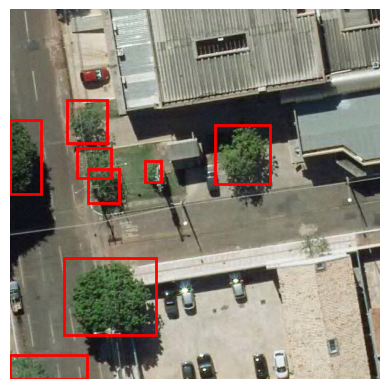

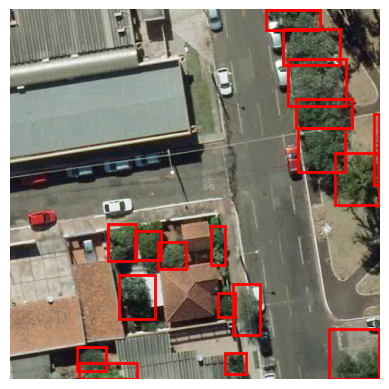

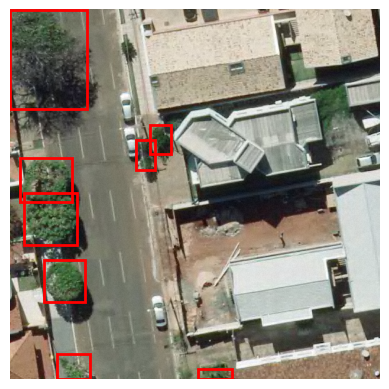

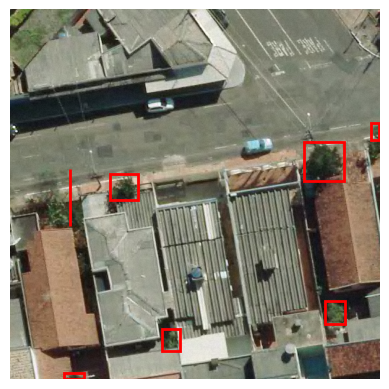

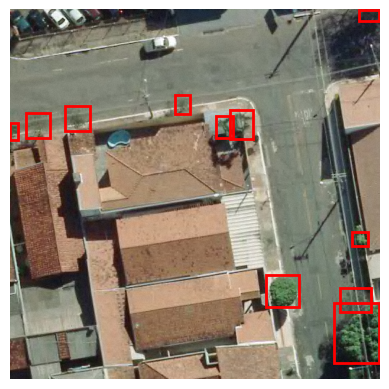

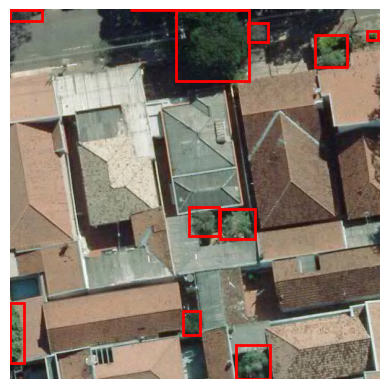

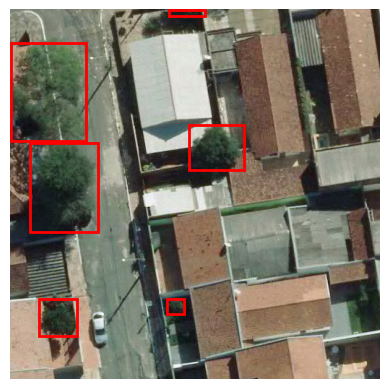

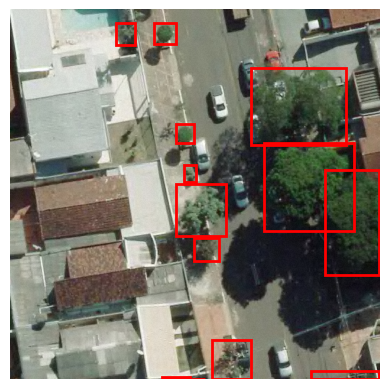

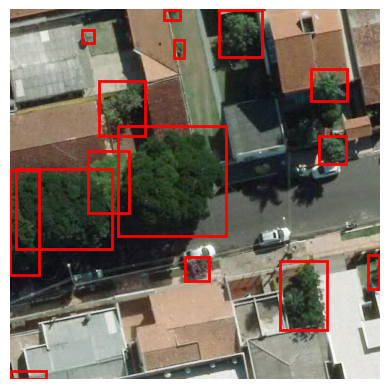

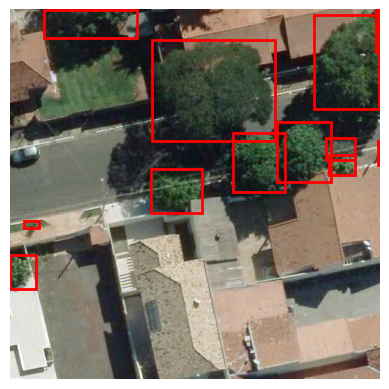

In [ ]:
###############################
##  Visualiza groundtrueth   ##
###############################

# Caminho base dos arquivos
base_path = '/content/RT-DETR/rtdetrv2_pytorch/dataset'

# Caminho das anotações e das imagens
annotations_path = os.path.join(base_path, 'annotations/instances_train.json')
image_dir = os.path.join(base_path, 'imagens/train')

# Carregar o arquivo JSON
with open(annotations_path, 'r') as f:
    data = json.load(f)

# Criar um dicionário para mapear IDs de imagens aos seus nomes
image_id_to_filename = {image['id']: image['file_name'] for image in data['images']}

# Criar um dicionário para agrupar bounding boxes por ID de imagem
image_id_to_bboxes = {}
for annotation in data['annotations']:
    image_id = annotation['image_id']
    bbox = annotation['bbox']  # Bounding box [x, y, width, height]
    if image_id not in image_id_to_bboxes:
        image_id_to_bboxes[image_id] = []
    image_id_to_bboxes[image_id].append(bbox)

# Lista para armazenar as imagens processadas
processed_images = []

# Iterar pelas primeiras 10 imagens
for idx, (image_id, bboxes) in enumerate(image_id_to_bboxes.items()):
    if idx >= 10:  # Limitar a 10 imagens
        break

    file_name = image_id_to_filename.get(image_id)
    if not file_name:
        print(f"Imagem com ID {image_id} não encontrada no JSON.")
        continue

    image_path = os.path.join(image_dir, file_name)
    if not os.path.exists(image_path):
        print(f"Arquivo de imagem não encontrado: {image_path}")
        continue

    # Abrir a imagem
    img = Image.open(image_path)

    # Exibir a imagem com todas as bounding boxes
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Adicionar todas as bounding boxes
    for bbox in bboxes:
        x, y, width, height = bbox
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    # Armazenar a imagem e o gráfico para posterior visualização
    processed_images.append({
        'image': img,
        'annotations': bboxes
    })

    # Mostrar o resultado
    plt.axis('off')
    plt.show()

# Agora, processed_images contém as 10 primeiras imagens com as bounding boxes sobrepostas
# Você pode salvar ou visualizar as imagens processadas mais tarde


In [ ]:
import shutil

# Exclui pasta que não serão mais utilizadas
lista_pastas = ('/content/individual_urban_tree_crown_detection','/content/sample_data')
for folder_path in lista_pastas:
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)  # Remove a pasta e todo o seu conteúdo
        print(f"A pasta {folder_path} e todo o seu conteúdo foram excluídos.")
    else:
        print(f"A pasta {folder_path} não existe.")


A pasta /content/individual_urban_tree_crown_detection não existe.
A pasta /content/sample_data não existe.


In [ ]:
# shutil.rmtree("/content/output")

### Atualizando configurações do modelo



In [ ]:
#########################################
##      Indica dataset para treino     ##
#########################################

# Caminho do arquivo YAML
file_path = '/content/RT-DETR/rtdetr_pytorch/configs/dataset/coco_detection.yml'

# Novo conteúdo para o arquivo
new_content = """
task: detection

num_classes: 2
remap_mscoco_category: False

train_dataloader:
  type: DataLoader
  dataset:
    type: CocoDetection
    img_folder: /content/RT-DETR/rtdetrv2_pytorch/dataset/imagens/train
    ann_file: /content/RT-DETR/rtdetrv2_pytorch/dataset/annotations/instances_train.json
    transforms:
      type: Compose
      ops: ~
  shuffle: True
  batch_size: 8
  num_workers: 4
  drop_last: True


val_dataloader:
  type: DataLoader
  dataset:
    type: CocoDetection
    img_folder: /content/RT-DETR/rtdetrv2_pytorch/dataset/imagens/val
    ann_file: /content/RT-DETR/rtdetrv2_pytorch/dataset/annotations/instances_val.json
    transforms:
      type: Compose
      ops: ~

  shuffle: False
  batch_size: 8
  num_workers: 4
  drop_last: False
"""

# Sobrescrever o arquivo YAML
with open(file_path, 'w') as f:
    f.write(new_content)

print(f"Conteúdo do arquivo {file_path} foi alterado com sucesso.")


Conteúdo do arquivo /content/RT-DETR/rtdetr_pytorch/configs/dataset/coco_detection.yml foi alterado com sucesso.


In [ ]:
#########################################
##            Treina o modelo          ##
#########################################
!python RT-DETR/rtdetr_pytorch/tools/train.py\
  -c /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_6x_coco.yml\
  --amp

2024-12-17 11:08:35.874105: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 11:08:35.893091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 11:08:35.914270: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 11:08:35.920696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 11:08:35.935904: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
#########################################
##            Treina o modelo          ##
#########################################
!python RT-DETR/rtdetr_pytorch/tools/train.py\
  -c /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_6x_coco.yml\
  -r /content/output/rtdetr_r18vd_6x_coco/checkpoint0071.pth\
  --amp

2024-12-17 12:07:53.775004: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 12:07:53.794302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 12:07:53.816071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 12:07:53.822600: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 12:07:53.838134: I tensorflow/core/platform/cpu_feature_guar

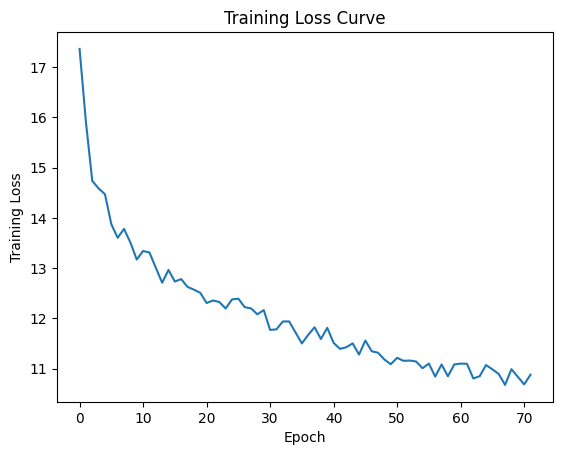

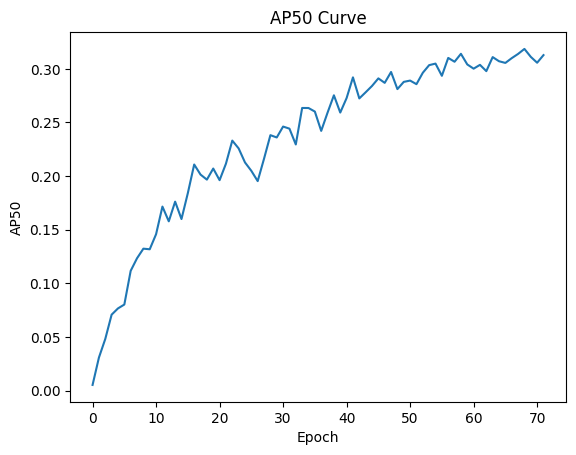

In [ ]:
##########################################
##             Análise do treino        ##
##########################################

# Graficos parte 1

def parse_log_file(file_path):
    epochs = []
    losses = []
    ap50s = []  # Assuming 'test_coco_eval_bbox' is related to AP50

    with open(file_path, 'r') as f:
        for line in f:
            data = json.loads(line)
            epochs.append(data['epoch'])
            losses.append(data['train_loss'])
            ap50s.append(data['test_coco_eval_bbox'][0])  # Assuming AP50 is the first value

    return epochs, losses, ap50s

# Replace 'log.txt' with the actual path to your log file
epochs, losses, ap50s = parse_log_file("/content/output/rtdetr_r18vd_6x_coco/log.txt")

# Plotting the loss curve
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

# Plotting the AP50 curve (if available)
if ap50s:
    plt.plot(epochs, ap50s)
    plt.xlabel('Epoch')
    plt.ylabel('AP50')
    plt.title('AP50 Curve')
    plt.show()

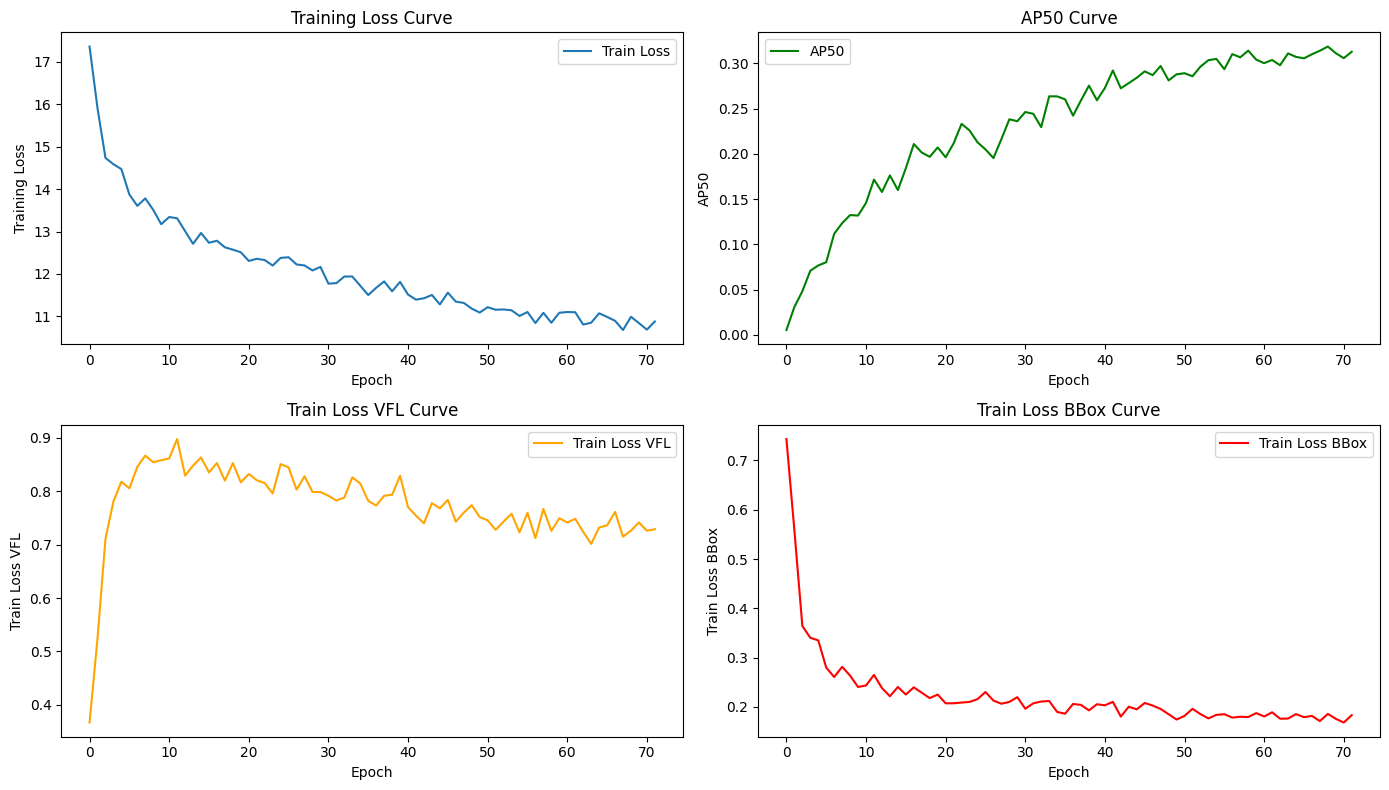

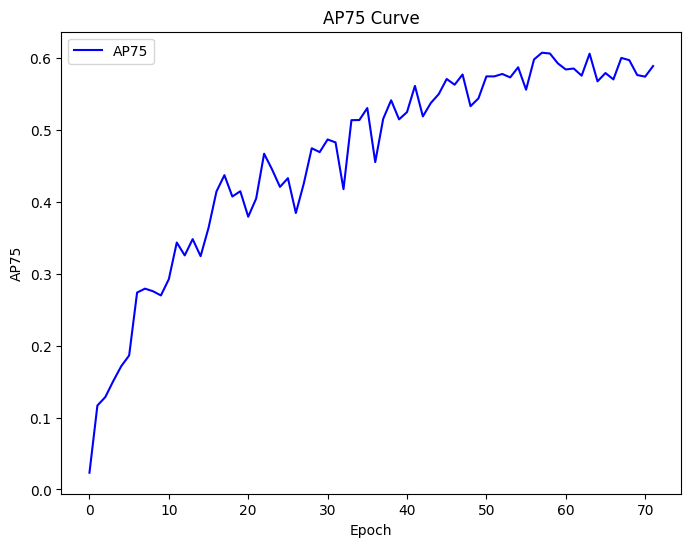

In [ ]:
# Graficos parte 2

def parse_log_file(file_path):
    epochs = []
    losses = []
    ap50s = []  # Assuming 'test_coco_eval_bbox' is related to AP50
    train_loss_vfl = []
    train_loss_bbox = []
    train_loss_giou = []
    ap75s = []  # Assuming 'test_coco_eval_bbox' has multiple values (e.g., AP50, AP75, etc.)

    with open(file_path, 'r') as f:
        for line in f:
            data = json.loads(line)
            epochs.append(data['epoch'])
            losses.append(data['train_loss'])
            ap50s.append(data['test_coco_eval_bbox'][0])  # AP50
            train_loss_vfl.append(data['train_loss_vfl'])
            train_loss_bbox.append(data['train_loss_bbox'])
            train_loss_giou.append(data['train_loss_giou'])
            if len(data['test_coco_eval_bbox']) > 1:
                ap75s.append(data['test_coco_eval_bbox'][1])  # Assuming AP75 is the second value

    return epochs, losses, ap50s, train_loss_vfl, train_loss_bbox, train_loss_giou, ap75s

# Replace 'log.txt' with the actual path to your log file
epochs, losses, ap50s, train_loss_vfl, train_loss_bbox, train_loss_giou, ap75s = parse_log_file('/content/output/rtdetr_r18vd_6x_coco/log.txt')

# Plotting the loss curve
plt.figure(figsize=(14, 8))

# Train Loss Curve
plt.subplot(2, 2, 1)
plt.plot(epochs, losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.legend()

# AP50 Curve
plt.subplot(2, 2, 2)
plt.plot(epochs, ap50s, label='AP50', color='green')
plt.xlabel('Epoch')
plt.ylabel('AP50')
plt.title('AP50 Curve')
plt.legend()

# Training Loss VFL Curve
plt.subplot(2, 2, 3)
plt.plot(epochs, train_loss_vfl, label='Train Loss VFL', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Train Loss VFL')
plt.title('Train Loss VFL Curve')
plt.legend()

# Training Loss BBox Curve
plt.subplot(2, 2, 4)
plt.plot(epochs, train_loss_bbox, label='Train Loss BBox', color='red')
plt.xlabel('Epoch')
plt.ylabel('Train Loss BBox')
plt.title('Train Loss BBox Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Additional plots for AP75 or other metrics
if ap75s:
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, ap75s, label='AP75', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('AP75')
    plt.title('AP75 Curve')
    plt.legend()
    plt.show()


### Copiando código iferencial

In [ ]:
import subprocess

processed_image_path = "/content/RT-DETR/rtdetrv2_pytorch/dataset/imagens/test/95.png"

command = [
    "python", "/content/RT-DETR/rtdetr_pytorch/tools/infer.py",
    "-c", "/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_6x_coco.yml",
    "-r", "/content/output/rtdetr_r18vd_6x_coco/checkpoint0068.pth",
    "-f", processed_image_path,
    "-s", "True",
    "-d", "cuda",
    "-nc", "100"
]

try:
    subprocess.run(command, check=True, text=True, capture_output=True)
    print("Inference completed successfully!")
except subprocess.CalledProcessError as e:
    print(f"Error executing the command: {e}")
    print("Standard output (stdout):")
    print(e.stdout)
    print("Error output (stderr):")
    print(e.stderr)

Inference completed successfully!


In [ ]:
###############################################
##                 INFERENCIA                ##
###############################################

!python3 /content/RT-DETR/rtdetr_pytorch/tools/infer.py \
    -c /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_6x_coco.yml \
    -r /content/output/rtdetr_r18vd_6x_coco/checkpoint0068.pth
    -f

2024-12-17 11:49:45.809221: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 11:49:45.828285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 11:49:45.849657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 11:49:45.856121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 11:49:45.871349: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
###############################################
##                 INFERENCIA                ##
###############################################

!python3 /content/RT-DETR/rtdetrv2_pytorch/tools/infer.py \
    --config /content/RT-DETR/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r18vd_120e_coco.yml \
    --resume /content/output/rtdetrv2_r18vd_120e_coco/checkpoint0153.pth \
    --im-file /content/RT-DETR/rtdetrv2_pytorch/dataset/imagens/test/84.png

2024-12-17 02:47:47.975265: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 02:47:47.993105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 02:47:48.014351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 02:47:48.020829: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 02:47:48.035882: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
############################################
##            Transfere + teste           ##
############################################

!python3 /content/RT-DETR/rtdetrv2_pytorch/tools/train.py \
  -c /content/RT-DETR/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r18vd_120e_coco.yml\
  -r /content/output/rtdetrv2_r18vd_120e_coco/checkpoint0120.pth\
  --test-only

2024-12-17 02:30:45.143646: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 02:30:45.160957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 02:30:45.182622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 02:30:45.189062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 02:30:45.204133: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
############################################
##            Transfere + teste + log     ##
############################################

# !python3 /content/RT-DETR/rtdetrv2_pytorch/tools/train.py \
#   -c /content/RT-DETR/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r18vd_120e_coco.yml\
#   -r /content/output/rtdetrv2_r18vd_120e_coco/best.pth\
#   --test-only\
#   --output-dir /content/Test

2024-12-17 01:50:29.497360: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 01:50:29.515352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 01:50:29.536628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 01:50:29.543061: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 01:50:29.558795: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
import pandas as pd
import json

def read_log_file(log_path):
    """Lê o arquivo de log e retorna uma lista de dicionários."""
    data = []
    with open(log_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:
                try:
                    record = json.loads(line)
                    data.append(record)
                except json.JSONDecodeError as e:
                    print(f"Erro ao decodificar JSON: {e}")
    return data

def round_numeric_columns(df, decimal_places=6):
    """Arredonda as colunas numéricas do DataFrame."""
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].round(decimal_places)
    return df

# Caminho do arquivo de log
log_path = '/content/output/rtdetr_r18vd_6x_coco/log.txt'

# Lê o arquivo de log e cria um DataFrame
data = read_log_file(log_path)
df = pd.DataFrame(data)

# Arredonda as colunas numéricas
df_rounded = round_numeric_columns(df)

# Salva o DataFrame como CSV
df_rounded.to_csv('/content/log_epocas.csv', index=True, sep=';', decimal=',')